In [1]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [12]:
#----------concatanating the data

data = pd.read_csv('../data/merged_patient0.csv')
for i in range(1,40):
    data = pd.concat([data, pd.read_csv('../data/merged_patient'+str(i)+'.csv')],ignore_index=True)

print('shape of the dataset...',data.shape)

#-----categorical data encoding ---------
cat = data[data.columns[-6-1:-1]]
print('number of categorical columns...',cat.shape[1])
encode = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame((encode.fit_transform(cat)).toarray())
enc_df.columns = ['RTG_h','RTG_l','RTG_n','RF_n','liver_i','liver_n','liver_r','peripheral_i','peripheral_n','peripheral_r','par1B', 'par1C', 'par1E', 'par1x','par2a', 'par2b', 'par2g', 'par2h', 'par2j', 'par2k', 'par2l', 'par2n', 'par2o', 'par2s', 'par2u', 'par2x']

###-----restructing the dataset-------
y=data['expected_glucose']
data=data.drop(data.columns[-1],axis=1)
data=data.drop(data.columns[-6:],axis=1)
data=data.drop(data.columns[0],axis=1)
data = data.join(enc_df)
data=data.join(y)
dataset=np.asarray(data,dtype='float32')

#---------- split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
trainX,trainY = train[:,:-1],train[:,-1]
testX,testY = test[:,:-1],test[:,-1]

#----------shapes of the training and the testing datsets
print("shape of training data...",trainX.shape)
trainY.reshape(1,-1)
print("shape of testing data...",testX.shape)
testY.reshape(1,-1)

shape of the dataset... (3880, 33)
number of categorical columns... 6
shape of training data... (2716, 51)
shape of testing data... (1164, 51)


array([[7.5082  , 7.5082  , 7.450989, ..., 8.946942, 9.235427, 9.340713]],
      dtype=float32)

In [64]:
#--training the model---
model=Sequential()
model.add(Dense(units=4,activation='sigmoid'))
model.add(Dense(units=4,activation='sigmoid'))
model.add(Dense(units=2,activation='sigmoid'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'],lea)

hist=model.fit(x=trainX,y=trainY,validation_data=(testX,testY), epochs=200)


Epoch 1/200
85/85 [==============================] - 0s 2ms/step - loss: 112.8216 - mse: 112.8216 - val_loss: 101.7903 - val_mse: 101.7903
Epoch 2/200
85/85 [==============================] - 0s 1ms/step - loss: 106.3118 - mse: 106.3118 - val_loss: 96.2345 - val_mse: 96.2345
Epoch 3/200
85/85 [==============================] - 0s 1ms/step - loss: 101.3244 - mse: 101.3244 - val_loss: 92.0252 - val_mse: 92.0252
Epoch 4/200
85/85 [==============================] - 0s 1ms/step - loss: 97.5095 - mse: 97.5095 - val_loss: 88.7510 - val_mse: 88.7510
Epoch 5/200
85/85 [==============================] - 0s 1ms/step - loss: 94.4844 - mse: 94.4844 - val_loss: 86.1002 - val_mse: 86.1002
Epoch 6/200
85/85 [==============================] - 0s 1ms/step - loss: 91.9721 - mse: 91.9721 - val_loss: 83.8404 - val_mse: 83.8404
Epoch 7/200
85/85 [==============================] - 0s 1ms/step - loss: 89.7936 - mse: 89.7936 - val_loss: 81.8463 - val_mse: 81.8463
Epoch 8/200
85/85 [============================

85/85 [==============================] - 0s 1ms/step - loss: 21.4942 - mse: 21.4942 - val_loss: 16.5536 - val_mse: 16.5536
Epoch 62/200
85/85 [==============================] - 0s 1ms/step - loss: 19.9872 - mse: 19.9872 - val_loss: 15.3478 - val_mse: 15.3478
Epoch 63/200
85/85 [==============================] - 0s 1ms/step - loss: 18.8126 - mse: 18.8126 - val_loss: 14.3834 - val_mse: 14.3834
Epoch 64/200
85/85 [==============================] - 0s 1ms/step - loss: 17.8490 - mse: 17.8490 - val_loss: 13.5987 - val_mse: 13.5987
Epoch 65/200
85/85 [==============================] - 0s 1ms/step - loss: 17.0400 - mse: 17.0400 - val_loss: 12.9321 - val_mse: 12.9321
Epoch 66/200
85/85 [==============================] - 0s 1ms/step - loss: 16.3473 - mse: 16.3473 - val_loss: 12.3592 - val_mse: 12.3592
Epoch 67/200
85/85 [==============================] - 0s 1ms/step - loss: 15.7453 - mse: 15.7453 - val_loss: 11.8691 - val_mse: 11.8691
Epoch 68/200
85/85 [==============================] - 0s 1ms/

Epoch 122/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5766 - mse: 11.5766 - val_loss: 8.9390 - val_mse: 8.9390
Epoch 123/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5760 - mse: 11.5760 - val_loss: 8.9398 - val_mse: 8.9398
Epoch 124/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5754 - mse: 11.5754 - val_loss: 8.9401 - val_mse: 8.9401
Epoch 125/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5762 - mse: 11.5762 - val_loss: 8.9419 - val_mse: 8.9419
Epoch 126/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5758 - mse: 11.5758 - val_loss: 8.9380 - val_mse: 8.9380
Epoch 127/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5758 - mse: 11.5758 - val_loss: 8.9403 - val_mse: 8.9403
Epoch 128/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5761 - mse: 11.5761 - val_loss: 8.9375 - val_mse: 8.9375
Epoch 129/200
85/85 [==============================] - 

85/85 [==============================] - 0s 1ms/step - loss: 11.5756 - mse: 11.5756 - val_loss: 8.9410 - val_mse: 8.9410
Epoch 183/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5759 - mse: 11.5759 - val_loss: 8.9409 - val_mse: 8.9409
Epoch 184/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5764 - mse: 11.5764 - val_loss: 8.9414 - val_mse: 8.9414
Epoch 185/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5764 - mse: 11.5764 - val_loss: 8.9369 - val_mse: 8.9369
Epoch 186/200
85/85 [==============================] - 0s 995us/step - loss: 11.5763 - mse: 11.5763 - val_loss: 8.9409 - val_mse: 8.9409
Epoch 187/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5760 - mse: 11.5760 - val_loss: 8.9401 - val_mse: 8.9401
Epoch 188/200
85/85 [==============================] - 0s 1ms/step - loss: 11.5760 - mse: 11.5760 - val_loss: 8.9422 - val_mse: 8.9422
Epoch 189/200
85/85 [==============================] - 0s 1ms/step 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             multiple                  208       
_________________________________________________________________
dense_23 (Dense)             multiple                  20        
_________________________________________________________________
dense_24 (Dense)             multiple                  10        
_________________________________________________________________
dense_25 (Dense)             multiple                  3         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


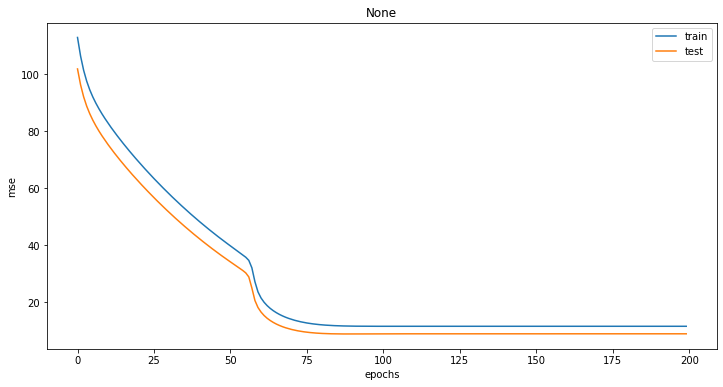

In [67]:
plt.figure(figsize=[12,6])
plt.title(str(model.summary()))
plt.plot(hist.history['mse'],label='train')
plt.plot(hist.history['val_mse'],label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show()

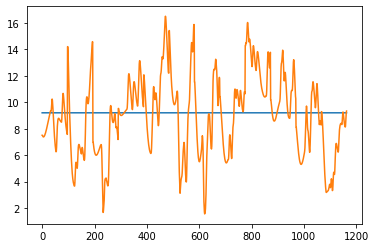

In [68]:
plt.plot(model.predict(testX))
plt.plot(testY)

In [71]:
?Dense